In [ ]:
import pandas as pd
import numpy as np
import h5py
from datetime import datetime, timedelta
import sys
### my analysis functions
from python_mobility import mobility_matrix_extract_modzcta as mm
from python_mobility import parameters as mp
from python_mobility import analysis as ma
### plot functions
from matplotlib.colors import TwoSlopeNorm, LogNorm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

my package for mobility extraction has been imported!


In [2]:
# Assuming 'ma' and 'mp' are modules or objects you've defined elsewhere
n_categories = 7 #5
mobility_map_method = '1tomore' #'1to1' '1tomore' 'loss_visitors' 
subfolder = 'mobility' if n_categories == 5 else 'mobility_cate7_{}'.format(mobility_map_method)

my_color = {2018:'green',2019:'blue',2020:'red', 2021:'orange',2022:'peru'}
start_date = pd.to_datetime('2020-02-03') ### moblity data start from monday to sunday 

dates_to_mark = [
    pd.to_datetime('2020-03-01'),
    pd.to_datetime('2020-03-16'),
    pd.to_datetime('2020-06-08'),
    pd.to_datetime('2020-09-30'),
    pd.to_datetime('2020-12-14')
]
subtitle_text = ['a','b','c','d','e','f']

In [3]:
Ms_combined = None
for y in [2020, 2021]:
    months = ['01', '02'] if y == 2021 else ['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    for month in months:
        Ms = ma.h5py_to_4d_array(f'../data/{subfolder}/M_raw_{y}{month}.h5')
        if Ms_combined is None:
            Ms_combined = Ms
        else:
            Ms_combined = np.concatenate((Ms_combined, Ms), axis=0)

num_days = Ms_combined.shape[0]
num_weeks = int(num_days / 7)

# flow_out = np.sum(Ms_combined, axis=2)
# flow_all = np.sum(flow_out, axis=2)
# data = flow_all[:, c]
# date_range = pd.date_range(start_date, periods=num_days, freq='D') ### if not week use 'D'

Ms_reshaped = Ms_combined.reshape(num_weeks, 7, n_categories, 177, 177)
Ms_weekly_sums = Ms_reshaped.sum(axis=1)
flow_out_wk = np.sum(Ms_weekly_sums, axis=2)
flow_all_wk = np.sum(flow_out_wk, axis=2)

In [4]:
flow_out_wk.shape

(56, 7, 177)

In [43]:
mp.cluster_name

{0: 'Grocery stores and pharmacies',
 1: 'General retail',
 2: 'Arts and entertainment venues',
 3: 'Restaurants and bars',
 4: 'Educational settings',
 5: 'Healthcare facilities',
 6: 'others'}

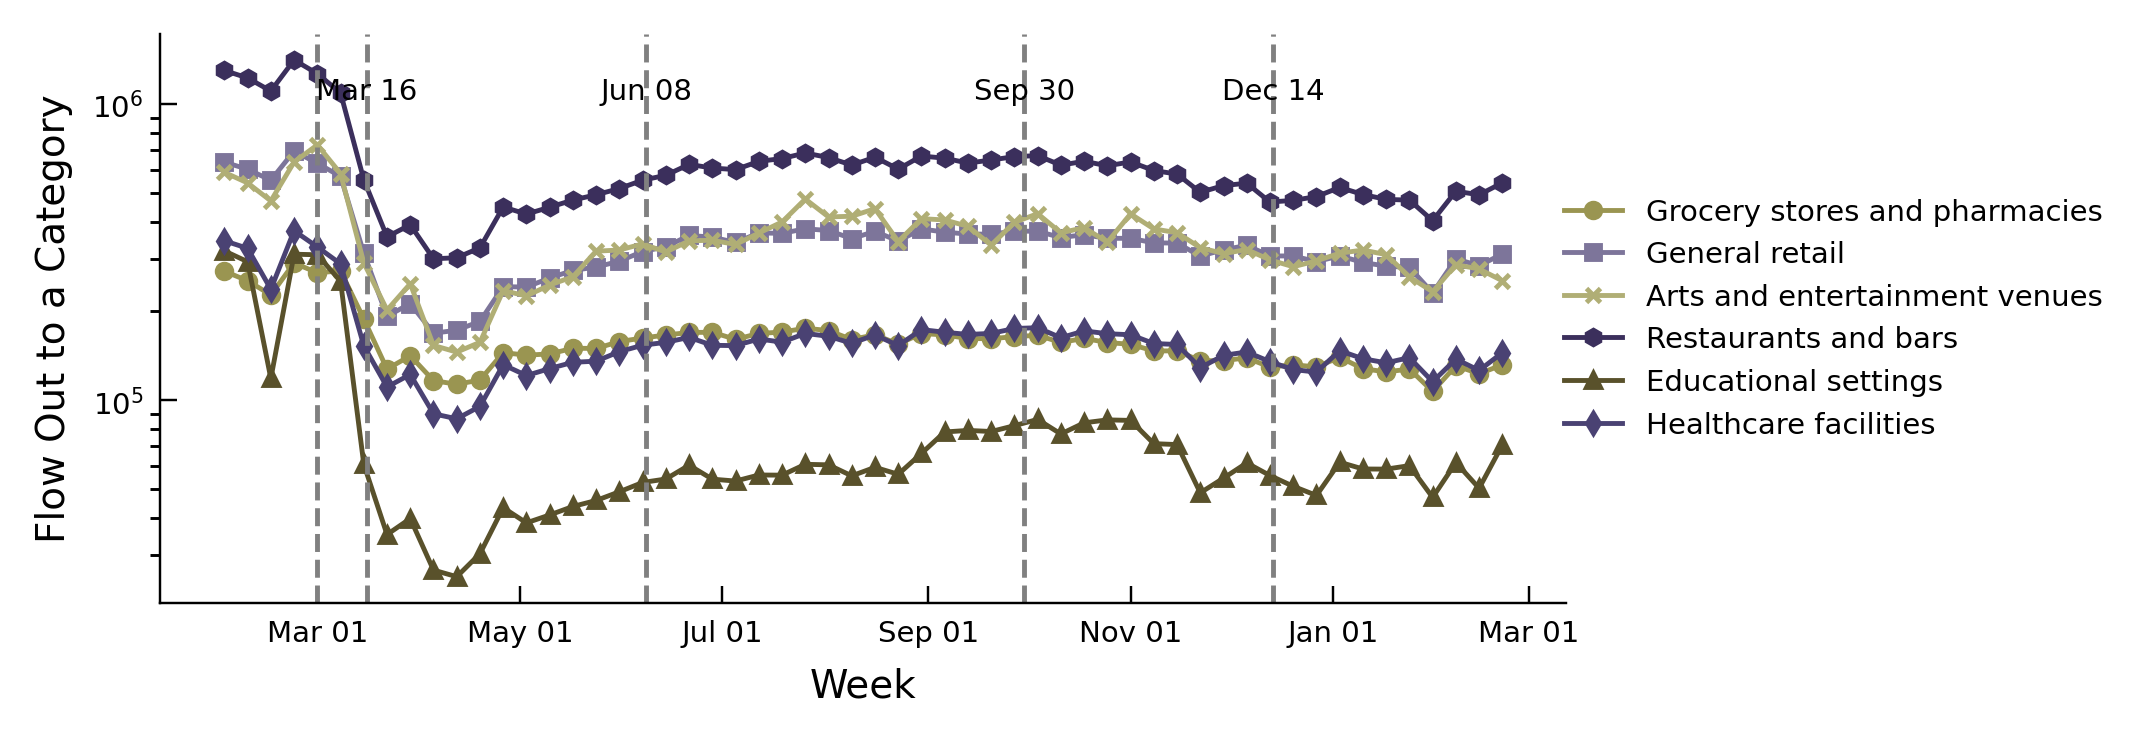

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

fig = plt.figure(figsize=(6, 2.), dpi=350,constrained_layout=True)  # Adjust figure size as needed
ax = fig.add_subplot(111)  # Single subplot for all categories

# Define different colors for each category
colors = ['#9A9551', '#7D759A', '#B0AE75', '#3B2F5C', '#59512B','#4A4273']
#3B2F5C - Deep Purple
#4A4273 - Slate Purple
#7D759A - Lavender Gray
#B0AE75 - Olive Green
#9A9551 - Mustard Olive
#59512B - Dark Olive
markers = ['o', 's', 'x', 'h', '^', 'd']
categories = range(6)  # Assuming there are 6 categories
start_date = '2020-02-01'  # Example start date, replace as needed

for c, color, marker in zip(categories, colors, markers):

    data = flow_all_wk[:, c]
    date_range = pd.date_range(start_date, periods=num_weeks, freq='W') ### if not week use 'D'
    
    ax.plot(date_range, data, label=mp.cluster_name[c], color=color, marker=marker, lw=1, markersize=3)

# Add annotations and formatting
for date in dates_to_mark:
    ax.axvline(date, color='gray', linestyle='--', linewidth=1)
    if date != pd.to_datetime('2020-03-01'):
        ax.annotate(date.strftime('%b %d'), xy=(date, 0.9), xycoords=('data', 'axes fraction'),
                    ha='center', va='center', fontsize=6, rotation=0, backgroundcolor='None')

ax.set_yscale('log')
# ax.set_title('Weekly Total Flow Out by Place Category', fontsize=8, loc='center')
ax.set_xlabel('Week', fontsize=8)
ax.set_ylabel('Flow Out to a Category', fontsize=8)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.tick_params(axis='both', which='major', labelsize=6, width=0.5, direction='in')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Display the legend
ax.legend(fontsize=6, loc='right', frameon=False, ncol=1, bbox_to_anchor=(1.4, 0.5)) #bbox_to_anchor=(0.5, -0.4)

# plt.tight_layout()
# plt.savefig('../results/plots_maps/mobility_cate7_1to1.png',pad_inches=0.,bbox_inches='tight',transparent=True,dpi = 350) #bbox_inches='tight',
# plt.show()

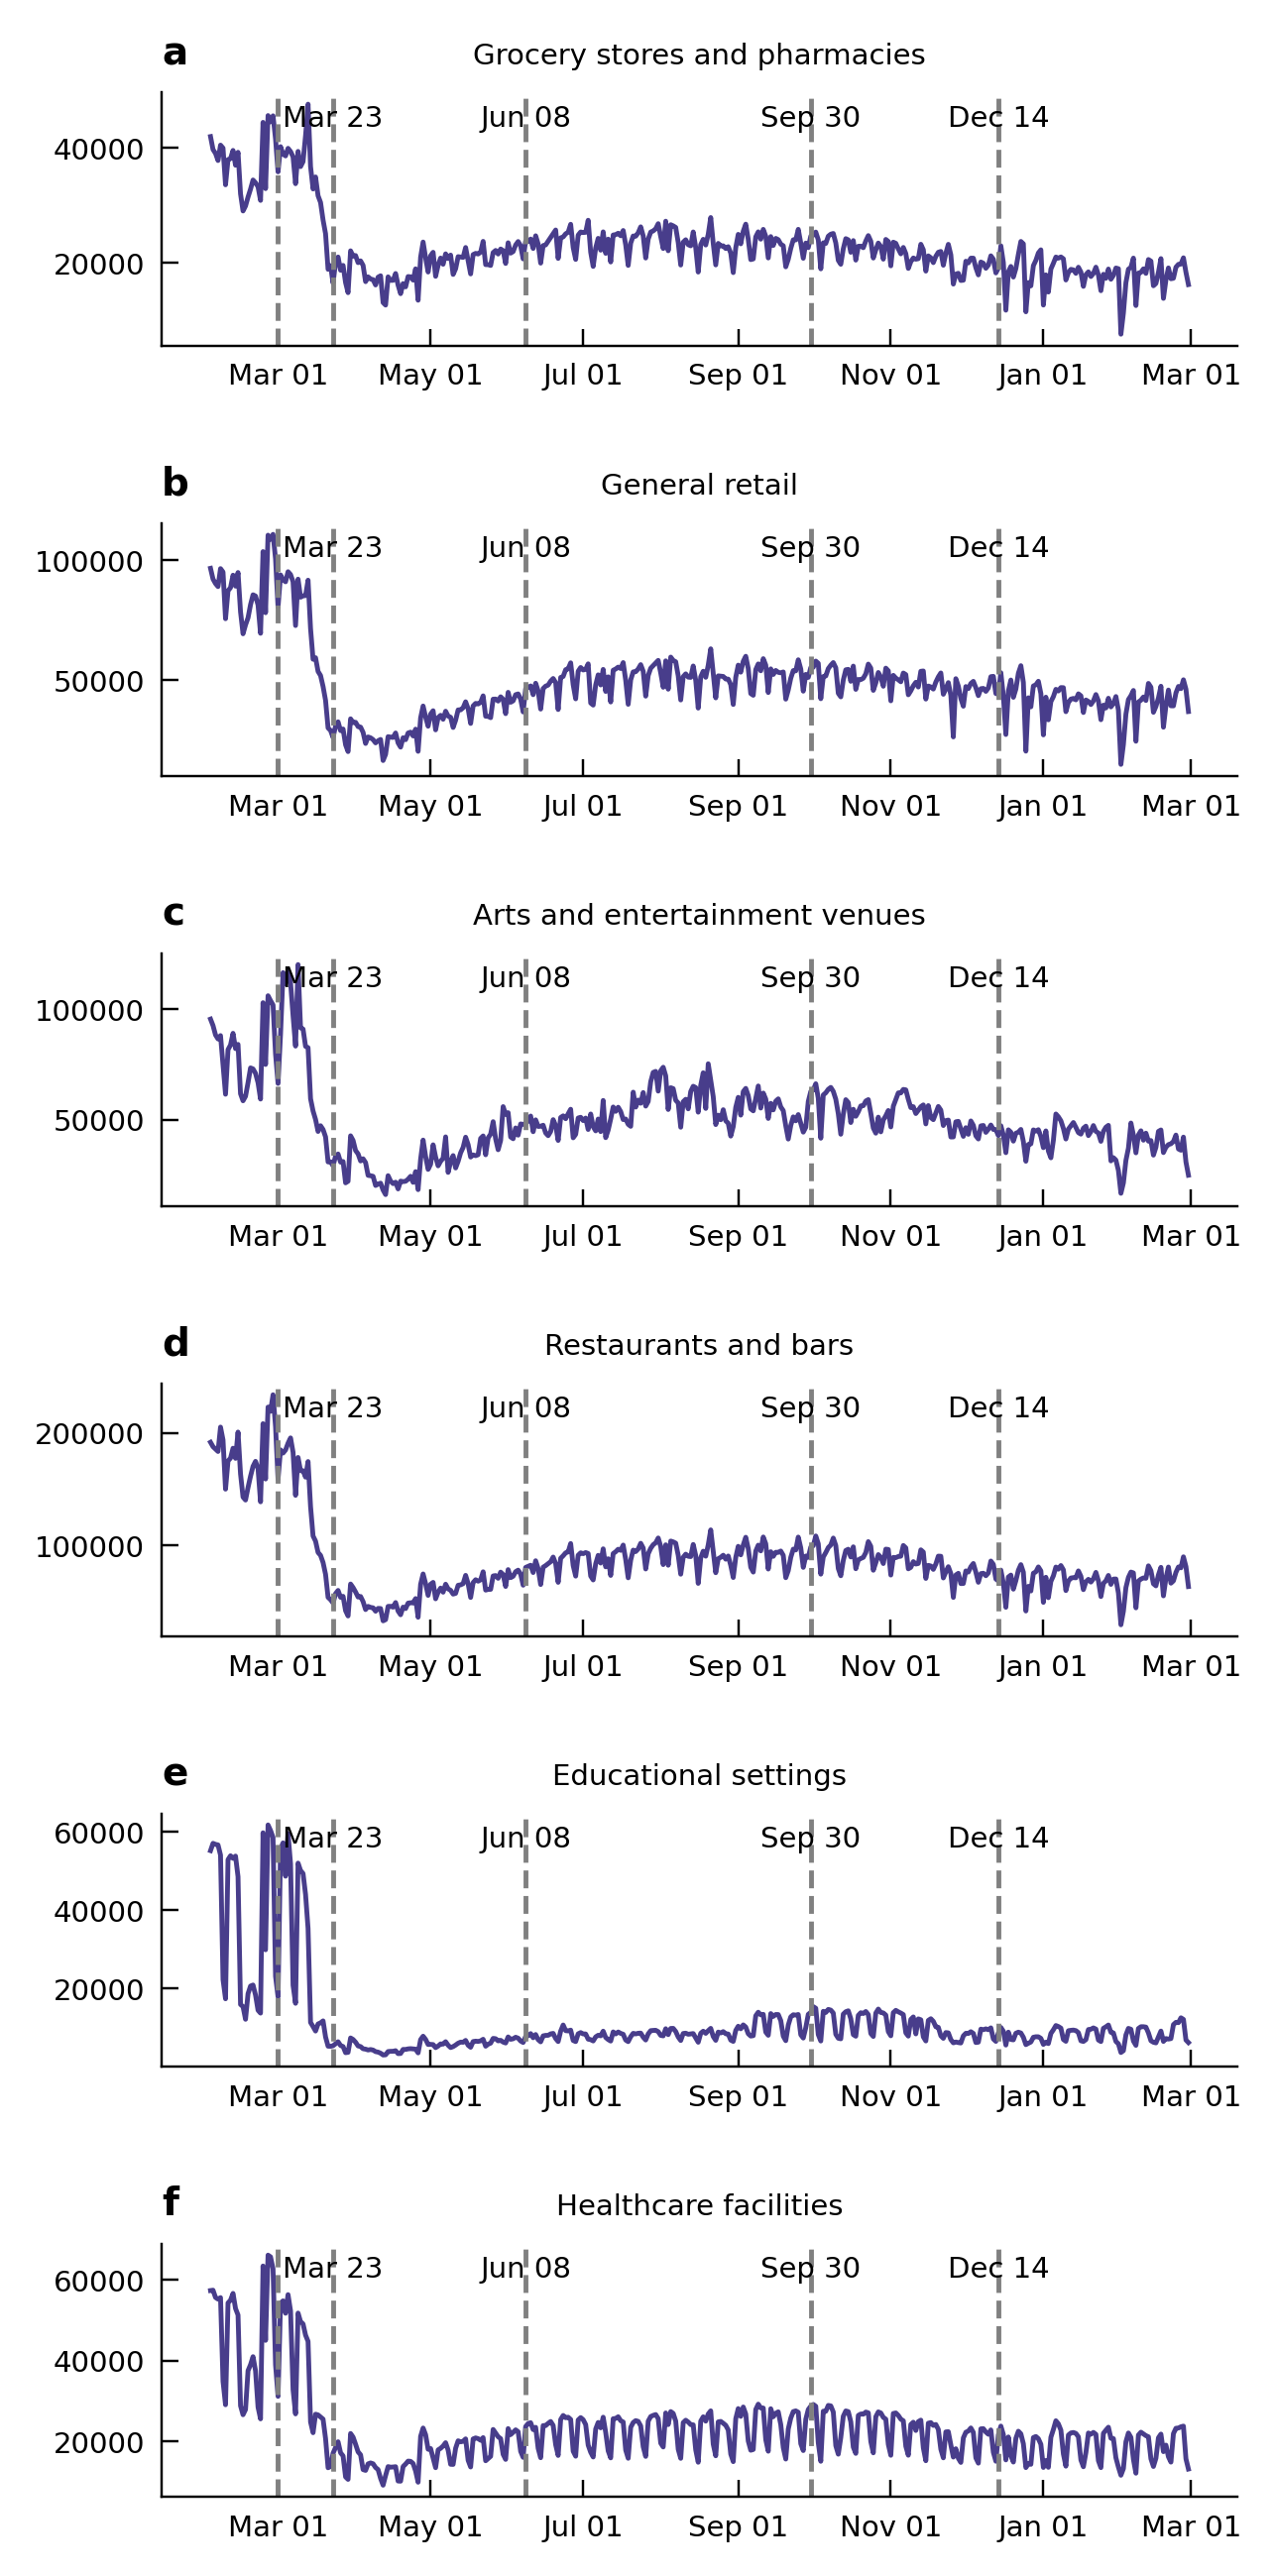

In [3]:
fig = plt.figure(figsize=(4, 9),dpi=350)  # Adjusted for 5 rows
# fig.suptitle('Start from the first week of Feb', fontsize=8, y=0.92)
gs = gridspec.GridSpec(n_categories-1, 1, height_ratios=[1]*(n_categories-1), hspace=0.7)  # 5 rows, 1 column
for c in range(6): #n_categories
    ax = plt.subplot(gs[c])
    Ms_combined = None
    for y in [2020, 2021]:
        # Load and concatenate data for more months if needed
        # Example for February, March, April (existing), extending to more months
        months = ['01', '02'] if y == 2021 else ['02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
        for month in months:# Extend this list with more months as needed
            Ms = ma.h5py_to_4d_array(f'../data/{subfolder}/M_raw_{y}{month}.h5')
#             print(y, month, Ms.shape)
            if Ms_combined is None:
                Ms_combined = Ms
            else:
                Ms_combined = np.concatenate((Ms_combined, Ms), axis=0)
        
        # Assuming the reshaping and summing process remains valid with additional data
    num_days = Ms_combined.shape[0]
    num_weeks = int(num_days/7)
    Ms_reshaped = Ms_combined.reshape(num_weeks, 7, n_categories, 177, 177)  # Adjust dimensions if needed
    Ms_weekly_sums = Ms_reshaped.sum(axis=1)
    flow_out = np.sum(Ms_combined, axis=2)
    flow_all = np.sum(flow_out, axis=2)

    data = flow_all[:, c]
    date_range = pd.date_range(start_date, periods=num_days, freq='D')
    ax.plot(date_range, data, label=f'{y}', c='darkslateblue',lw=1)
    
    for date in dates_to_mark:
        ax.axvline(date, color='gray', linestyle='--', linewidth=1)  # Mark the date with a vertical line
        if date != pd.to_datetime('2020-03-01'):
            ax.annotate(date.strftime('%b %d'), xy=(date, 0.9), xycoords=('data', 'axes fraction'),
                    ha='center', va='center', fontsize=6, rotation=0, backgroundcolor='None')
    
    ax.set_title(mp.cluster_name[c], fontsize=6)
    # ax.set_xlabel('Time from the first Monday', fontsize=6)
    ax.set_title(subtitle_text[c], fontsize=8,loc='left',fontweight='bold')
#     ax.set_ylabel('The weekly total flow out', fontsize=8)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.tick_params(axis='both', which='major', labelsize=6,width=0.5,direction='in')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)  # Left spine with thinner line
    ax.spines['bottom'].set_linewidth(0.5)
#     ax.axvspan(27.5, 28.5, facecolor='gray', alpha=0.5, label='2nd March (Monday)')
# Assuming the legend in the last subplot is still desired
handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='best')

# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main 
# plt.savefig('../results/plots_maps/mobility_cate7_1to1.png',bbox_inches='tight',pad_inches=0,dpi = 350)

In [6]:
df_mod_idx = pd.read_csv('../results/counts/modzcta_zip_counts.csv')
modzcta = df_mod_idx[['MODZCTA','mod_idx']]
df_mod = modzcta.sort_values(by='mod_idx').drop_duplicates()
df_mod = df_mod.reset_index(drop=True)

In [7]:
Lists_all_names = []
new_data = {}
Ms_wksum_out = flow_out_wk

for c in range(n_categories):
    # c_name = mp.cluster_name[c]
    c_name = mp.cluster_name0[c]
    print(c_name)
    wksum = Ms_wksum_out[:, c, :]
    list_names = [c_name + '_' + str(i) for i in range(wksum.shape[0])]  
    Lists_all_names.extend(list_names)
    
    # Append the new data to the dictionary with the appropriate column names
    for n_i, n in enumerate(list_names):
        new_data[n] = wksum[n_i, :]


df_new_data = pd.DataFrame(new_data)
df_mod = pd.concat([df_mod, df_new_data], axis=1)
df_mod['MODZCTA'] = df_mod['MODZCTA'].astype(str)

Grocery&Pharmacies
Retails
Arts&Entertainment
Restaurants&Bars
Educations
Healthcares
others


In [9]:
Ms_wksum_out.shape

(56, 7, 177)

In [7]:
df_mod.to_csv('../data/raw_mobility/outflow_7c_wk_raw_{}.csv'.format(mobility_map_method),index=False)

Geoplot

In [8]:
df_sed_nyc = pd.read_csv('../Data/sed_nyc_modzcta_2021.csv')
df_pop = df_sed_nyc[['MODZCTA','Population']].copy()
df_idx = df_mod[['MODZCTA','mod_idx']].copy()
df_idx['MODZCTA'] = df_idx['MODZCTA'].astype(int)
df_pop_sorted = df_idx.merge(df_pop, on='MODZCTA', how='left')
### shapefile 

import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import Normalize
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from matplotlib.colors import TwoSlopeNorm, LogNorm 
import matplotlib.ticker as mticker
gdf = gpd.read_file('../Data/geography_data/MODZCTA_2010.shp')
gdf['MODZCTA'] = gdf['MODZCTA'].astype(np.int64)

In [37]:
ms_geo  = Ms_wksum_out[6:,:,:]
print(ms_geo.shape)
ms_var = np.var(ms_geo, axis=0)
ms_var.shape
pop = df_pop_sorted['Population'].values

(50, 7, 177)


(7, 177)

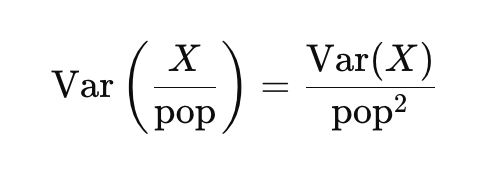

In [65]:
for c in range(6):
    c_name = mp.cluster_name[c]
    print (c_name) 
    ms_var_pop= ms_var[c,:]/(pop**2)*10_000
    print(np.nanmax(ms_var_pop), np.nanmin(ms_var_pop))
    df_pop_sorted['var_{}'.format(c)] = ms_var_pop
    gdf_merged = gdf.merge(df_pop_sorted, on='MODZCTA', how='left')

Grocery stores and pharmacies
0.20909304948486318 0.0044498961431148855
General retail
2.3841680229535687 0.06913656711200049
Arts and entertainment venues
2.0602824332273904 0.2558568920794622
Restaurants and bars
3.388604312768347 0.37821244669257265
Educational settings
0.24439623098590446 0.008251048708599428
Healthcare facilities
0.453437225744255 0.012336321961235675


Grocery stores and pharmacies
General retail
Arts and entertainment venues
Restaurants and bars
Educational settings
Healthcare facilities


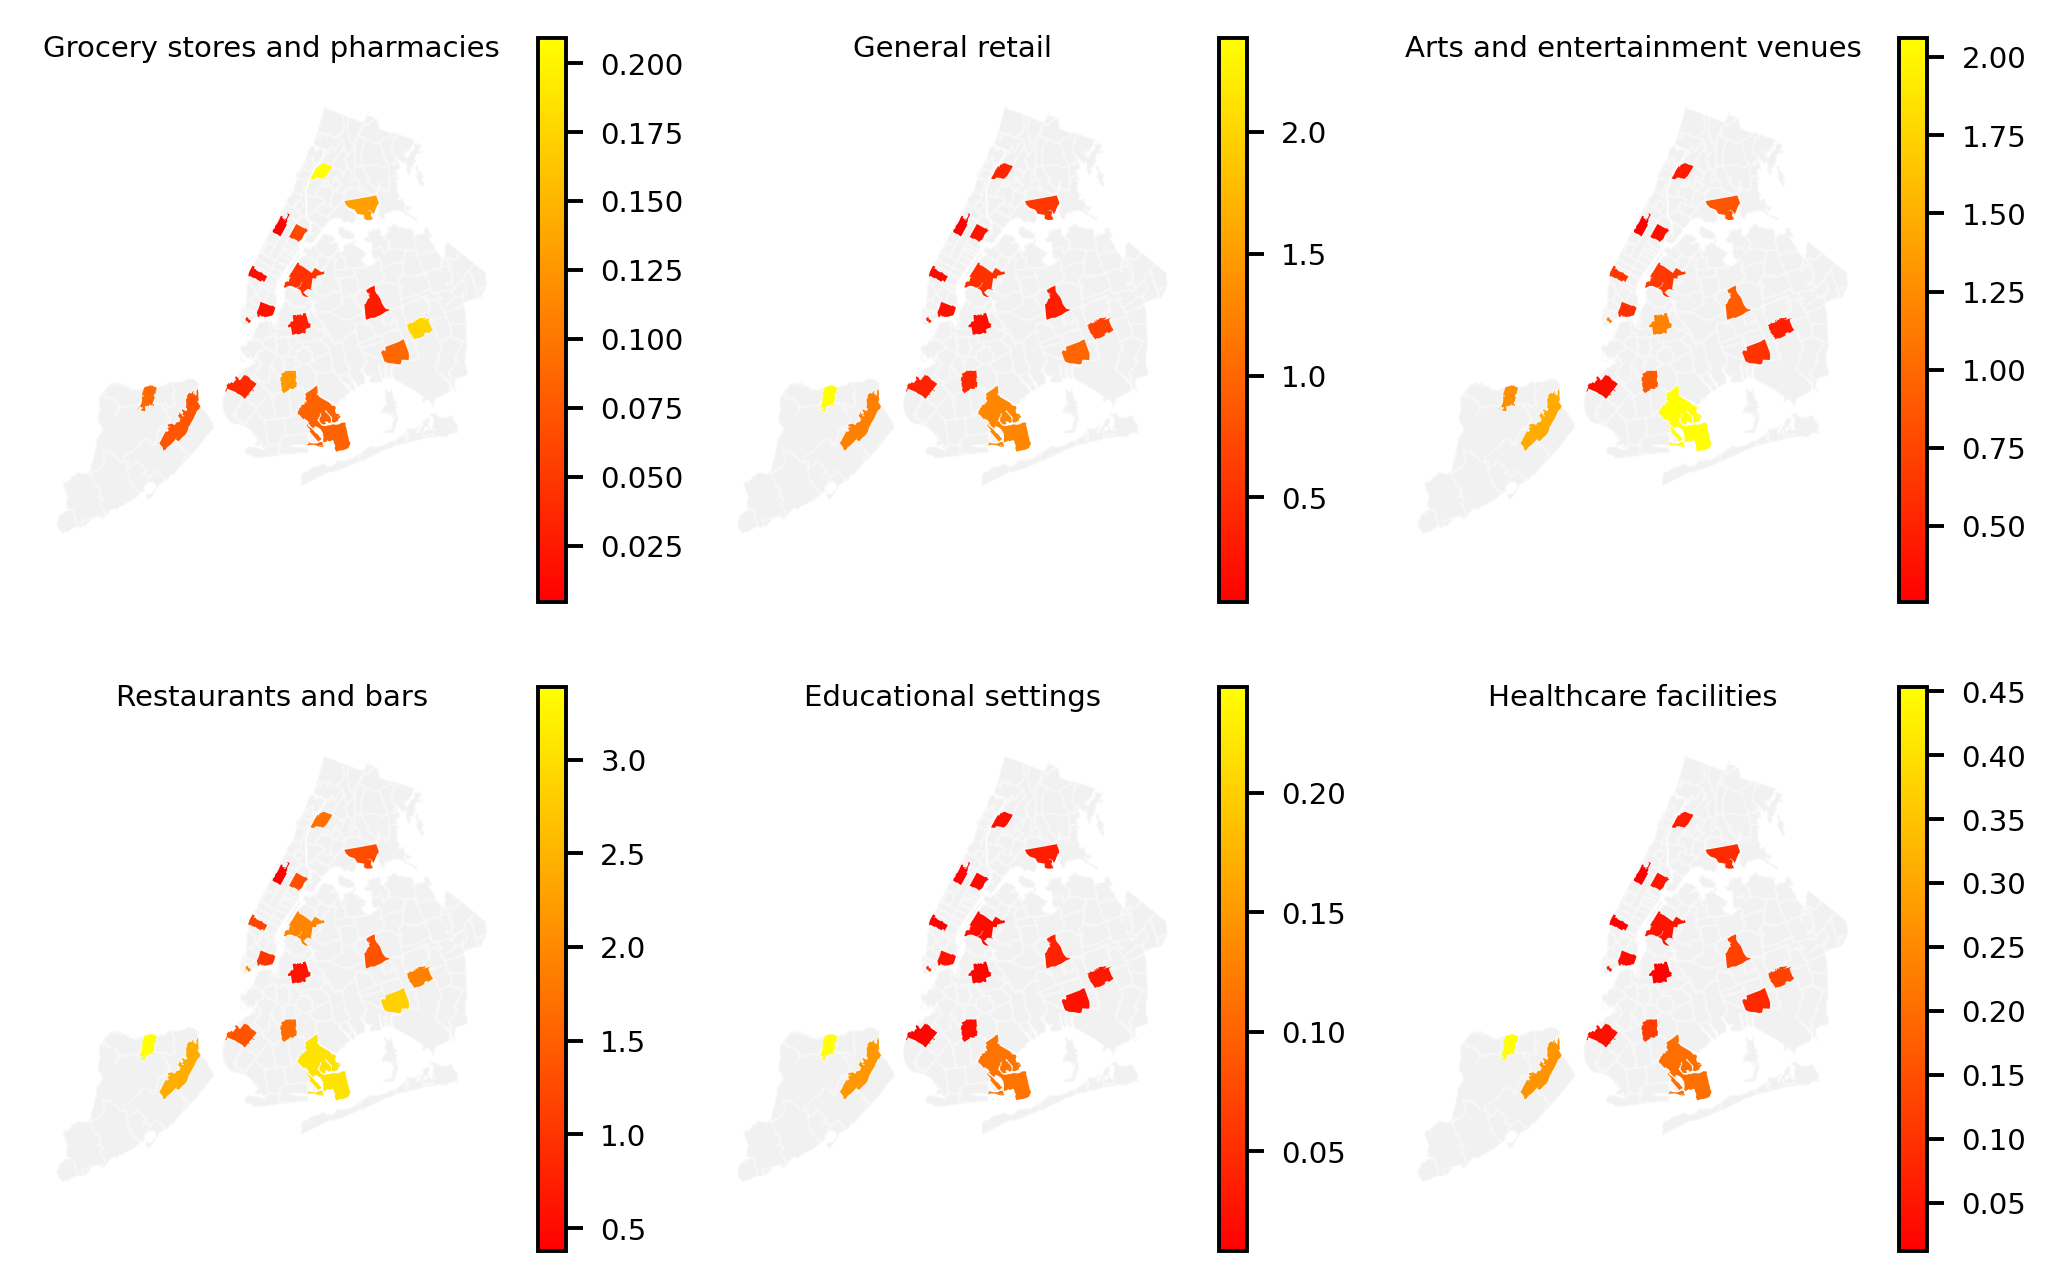

In [84]:
dpi = 350
figsize = (7.2, 4.5)

fig = plt.figure(figsize=figsize,dpi = dpi)  
gs = gridspec.GridSpec(2, 3, height_ratios=[1,1], hspace=0.15, wspace=0.15)
axes = [fig.add_subplot(gs[i]) for i in range(6)]

for idx, ax in enumerate(axes):
    c_name = mp.cluster_name[idx]
    print (c_name)   

    gdf_merged.plot(ax=ax, color='lightgrey', edgecolor='white',linewidth=0.5,alpha=0.3)
    # norm = norm_dict_pop[c]
    cbar_plot = gdf_merged.plot(column='var_{}'.format(idx), cmap='autumn',ax=ax,legend=True)
        # Modify the colorbar font size using tick_params after it's created
    cbar = ax.get_figure().axes[-1]
    cbar.tick_params(labelsize=6) 
    # cbar.yaxis.set_major_formatter(mticker.PercentFormatter())

    ax.set_title(c_name,fontsize=6,loc='center')
    # ax.text(0.5, -0.1, subtitle_text, va='center', ha='center', transform=ax.transAxes, fontsize=10)
    ax.axis('off')
    # Save each frame to a file
    ## perpop_
filename = f'../results/plots_maps/visits_pop_var.png' #
plt.savefig(filename, bbox_inches='tight',pad_inches=0,dpi=dpi,transparent=True)
    # plt.close()

In [10]:
mv_start = Ms_wksum_out[3,:,:]
mv_end = Ms_wksum_out[3+52,:,:]
mv_diff = ((mv_end - mv_start)/mv_start)*100
print(mv_diff.shape)
for c in range(6):
    c_name = mp.cluster_name[c]
    print (c_name) 
    print(np.nanmax(mv_diff[c]), np.nanmin(mv_diff[c]))
    df_pop_sorted['diff_{}'.format(c)] = mv_diff[c]
gdf_merged = gdf.merge(df_pop_sorted, on='MODZCTA', how='left')

(7, 177)
Grocery stores and pharmacies
-11.213045032545633 -82.95859854597877
General retail
0.0032459904760743946 -84.81781368726305
Arts and entertainment venues
-8.150312551170671 -83.30868474982489
Restaurants and bars
-28.5583247238811 -84.51959614434432
Educational settings
-48.18846928294126 -95.86275605972527
Healthcare facilities
-38.297107156350364 -84.32892851797153


Grocery stores and pharmacies
General retail
Arts and entertainment venues
Restaurants and bars
Educational settings
Healthcare facilities


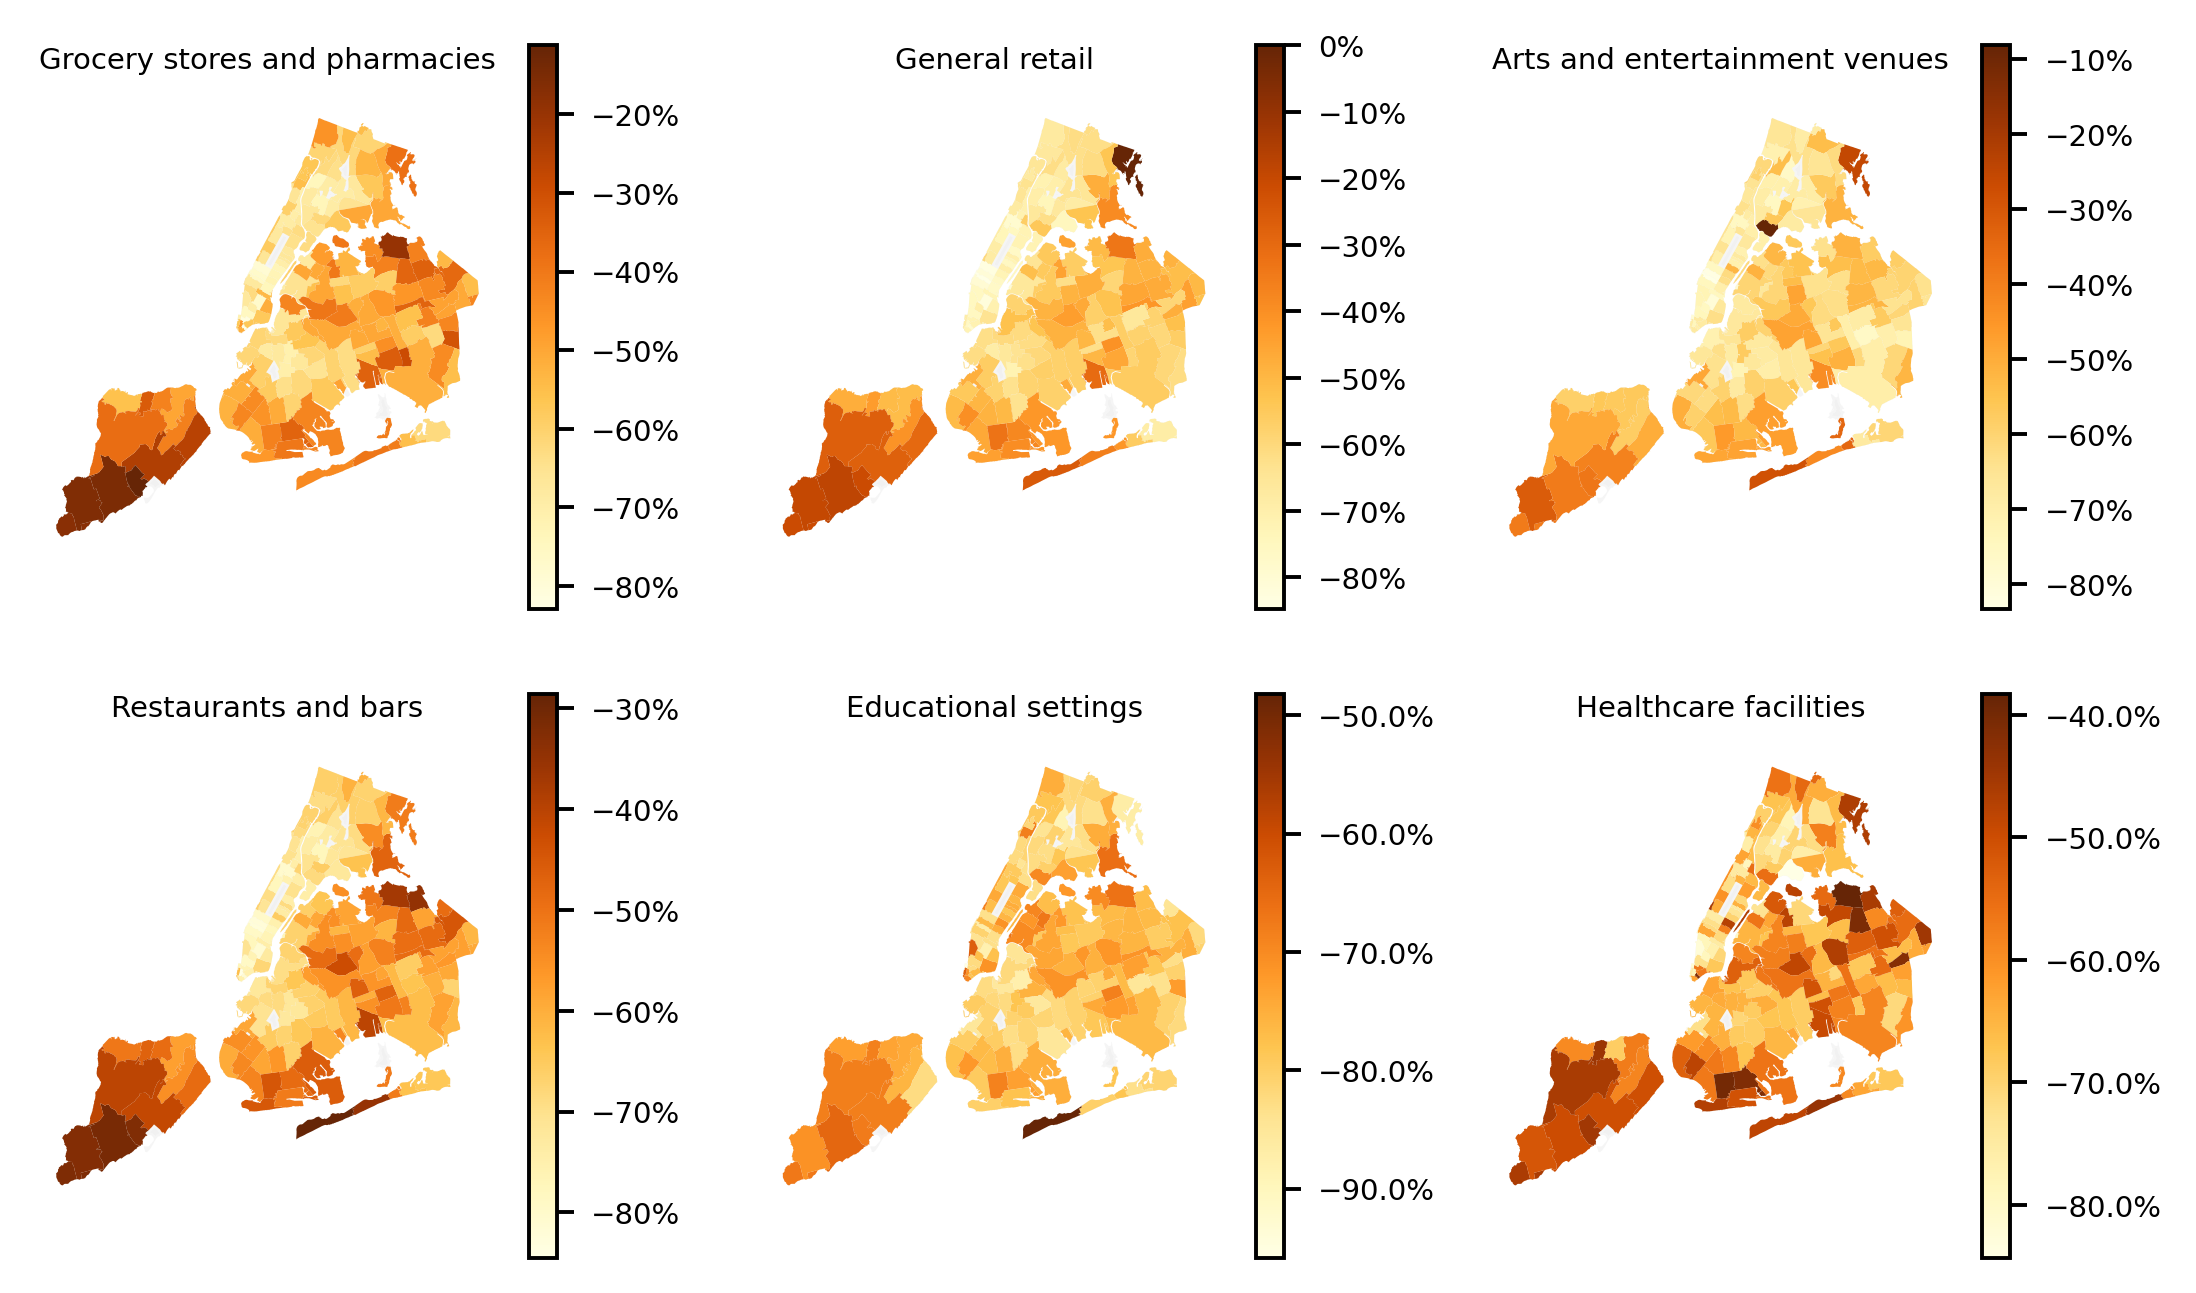

In [15]:
dpi = 350
figsize = (7.5, 4.5)

fig = plt.figure(figsize=figsize,dpi = dpi)  
gs = gridspec.GridSpec(2, 3, height_ratios=[1,1], hspace=0.15, wspace=0.25)
axes = [fig.add_subplot(gs[i]) for i in range(6)]

for idx, ax in enumerate(axes):
    c_name = mp.cluster_name[idx]
    print (c_name)   

    gdf_merged.plot(ax=ax, color='lightgrey', edgecolor='white',linewidth=1,alpha=.3)
    # norm = norm_dict_pop[c]
    cbar_plot = gdf_merged.plot(column='diff_{}'.format(idx), cmap='YlOrBr',ax=ax,legend=True)
        # Modify the colorbar font size using tick_params after it's created
    cbar = ax.get_figure().axes[-1]
    cbar.tick_params(labelsize=6) 
    cbar.yaxis.set_major_formatter(mticker.PercentFormatter())

    ax.set_title(c_name,fontsize=6,loc='center')
    # ax.text(0.5, -0.1, subtitle_text, va='center', ha='center', transform=ax.transAxes, fontsize=10)
    ax.axis('off')
    # Save each frame to a file
    ## perpop_
filename = f'../results/plots_maps/visits_diff.png' #
plt.savefig(filename, bbox_inches='tight',pad_inches=0,dpi=dpi,transparent=True)
    # plt.close()